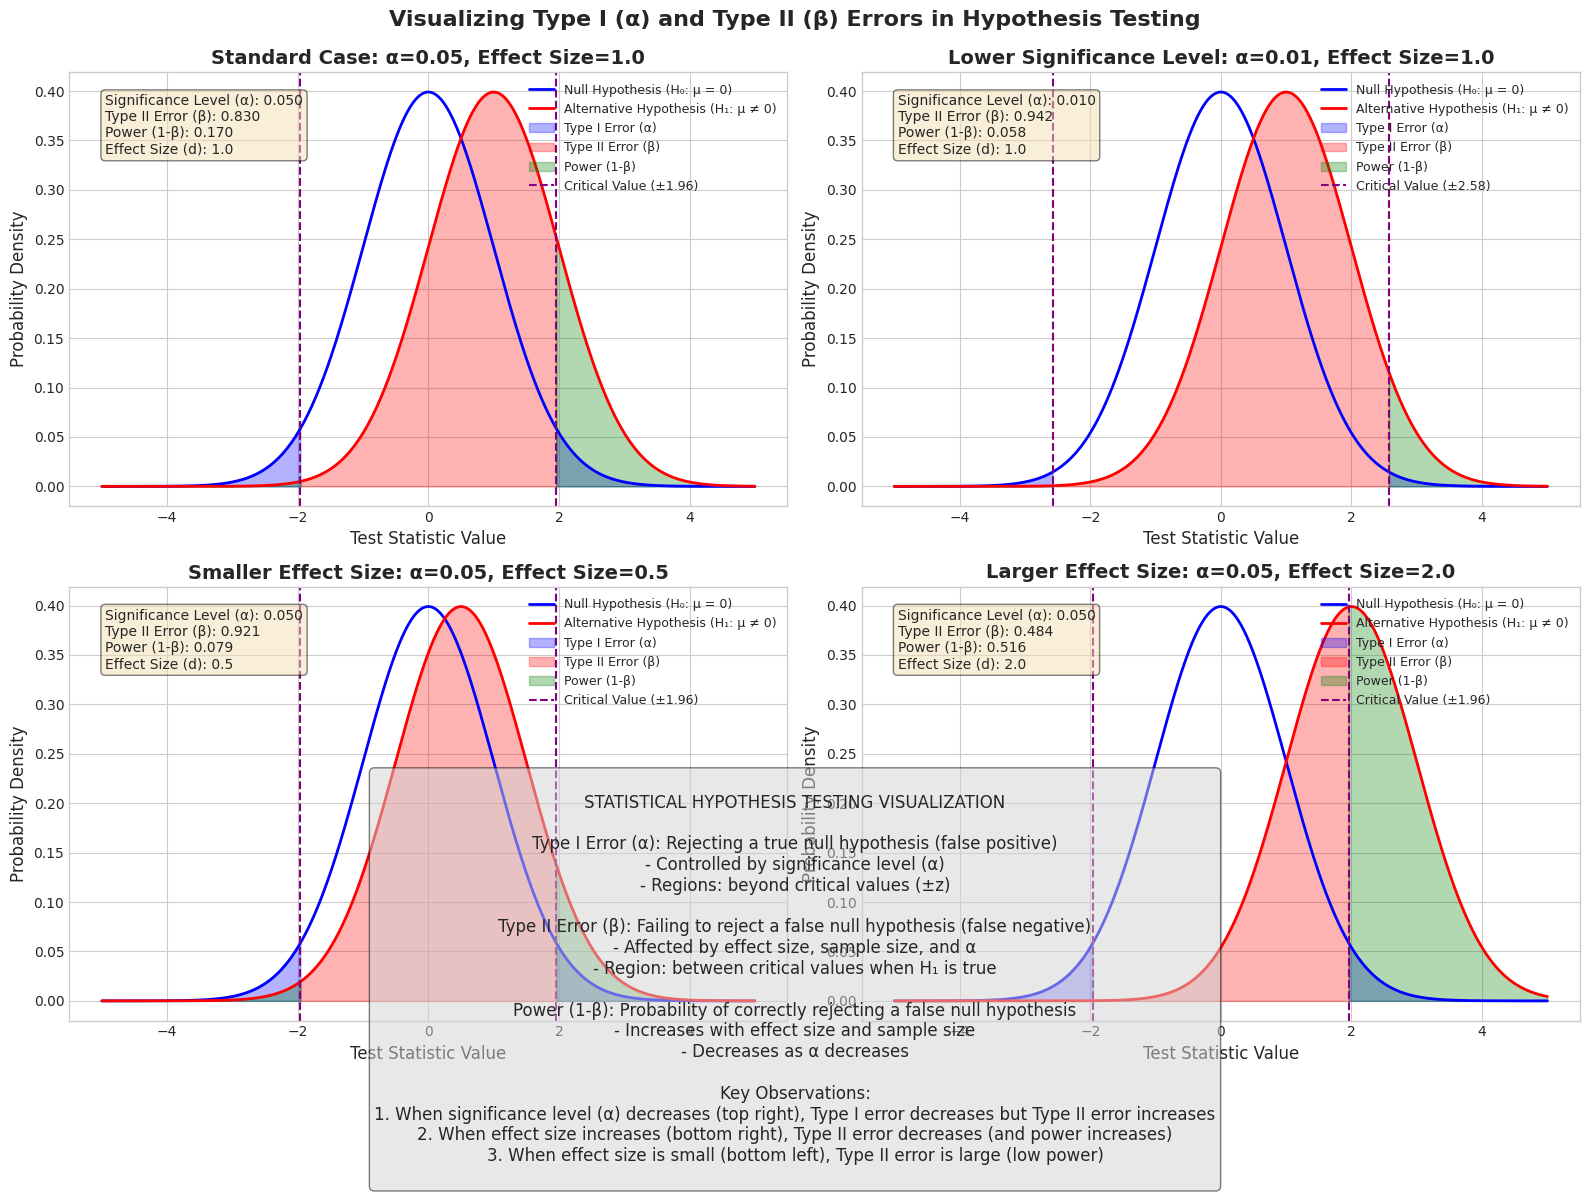

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec

# Function to create a single hypothesis testing plot
def create_hypothesis_test_plot(ax, alpha, effect_size):
    # Set up x range
    x = np.linspace(-5, 5, 1000)
    
    # Critical values for two-tailed test
    critical_value = stats.norm.ppf(1 - alpha/2)
    
    # Null hypothesis distribution (μ = 0, σ = 1)
    y_null = stats.norm.pdf(x, 0, 1)
    
    # Alternative hypothesis distribution (μ = effect_size, σ = 1)
    y_alt = stats.norm.pdf(x, effect_size, 1)
    
    # Calculate areas for errors
    # Type I error (α) - false positive area
    x_typeI = np.linspace(critical_value, 5, 200)
    y_typeI = stats.norm.pdf(x_typeI, 0, 1)
    x_typeI_neg = np.linspace(-5, -critical_value, 200)
    y_typeI_neg = stats.norm.pdf(x_typeI_neg, 0, 1)
    
    # Type II error (β) - false negative area
    x_typeII = np.linspace(-critical_value, critical_value, 200)
    y_typeII = stats.norm.pdf(x_typeII, effect_size, 1)
    
    # Power (1-β) - true positive area
    x_power_right = np.linspace(critical_value, 5, 200)
    y_power_right = stats.norm.pdf(x_power_right, effect_size, 1)
    x_power_left = np.linspace(-5, -critical_value, 200)
    y_power_left = stats.norm.pdf(x_power_left, effect_size, 1)
    
    # Plot the distributions
    ax.plot(x, y_null, 'b-', linewidth=2, label='Null Hypothesis (H₀: μ = 0)')
    ax.plot(x, y_alt, 'r-', linewidth=2, label='Alternative Hypothesis (H₁: μ ≠ 0)')
    
    # Fill in the error areas
    ax.fill_between(x_typeI, 0, y_typeI, color='blue', alpha=0.3, label='Type I Error (α)')
    ax.fill_between(x_typeI_neg, 0, y_typeI_neg, color='blue', alpha=0.3)
    ax.fill_between(x_typeII, 0, y_typeII, color='red', alpha=0.3, label='Type II Error (β)')
    
    # Fill in the power area
    ax.fill_between(x_power_right, 0, y_power_right, color='green', alpha=0.3, label='Power (1-β)')
    ax.fill_between(x_power_left, 0, y_power_left, color='green', alpha=0.3)
    
    # Add vertical lines for critical values
    ax.axvline(x=critical_value, color='purple', linestyle='--', linewidth=1.5, 
               label=f'Critical Value (±{critical_value:.2f})')
    ax.axvline(x=-critical_value, color='purple', linestyle='--', linewidth=1.5)
    
    # Calculate actual errors
    type_I_error = alpha
    type_II_error = stats.norm.cdf(critical_value, loc=effect_size) - stats.norm.cdf(-critical_value, loc=effect_size)
    power = 1 - type_II_error
    
    # Annotations - add text boxes with error values
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        f'Significance Level (α): {type_I_error:.3f}',
        f'Type II Error (β): {type_II_error:.3f}',
        f'Power (1-β): {power:.3f}',
        f'Effect Size (d): {effect_size}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    # Set labels
    ax.set_xlabel('Test Statistic Value', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.legend(loc='upper right', fontsize=9)
    
    return ax

# Create a 2x2 grid of plots showing different combinations
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2)

# 1. Top left: Standard case (α=0.05, effect size=1.0)
ax1 = plt.subplot(gs[0, 0])
create_hypothesis_test_plot(ax1, alpha=0.05, effect_size=1.0)
ax1.set_title('Standard Case: α=0.05, Effect Size=1.0', fontsize=14, fontweight='bold')

# 2. Top right: Lower significance level (α=0.01, effect size=1.0)
ax2 = plt.subplot(gs[0, 1])
create_hypothesis_test_plot(ax2, alpha=0.01, effect_size=1.0)
ax2.set_title('Lower Significance Level: α=0.01, Effect Size=1.0', fontsize=14, fontweight='bold')

# 3. Bottom left: Smaller effect size (α=0.05, effect size=0.5)
ax3 = plt.subplot(gs[1, 0])
create_hypothesis_test_plot(ax3, alpha=0.05, effect_size=0.5)
ax3.set_title('Smaller Effect Size: α=0.05, Effect Size=0.5', fontsize=14, fontweight='bold')

# 4. Bottom right: Larger effect size (α=0.05, effect size=2.0)
ax4 = plt.subplot(gs[1, 1])
create_hypothesis_test_plot(ax4, alpha=0.05, effect_size=2.0)
ax4.set_title('Larger Effect Size: α=0.05, Effect Size=2.0', fontsize=14, fontweight='bold')

# Add a colorful box explaining the concepts
explanation = """
STATISTICAL HYPOTHESIS TESTING VISUALIZATION

Type I Error (α): Rejecting a true null hypothesis (false positive)
- Controlled by significance level (α)
- Regions: beyond critical values (±z)

Type II Error (β): Failing to reject a false null hypothesis (false negative)
- Affected by effect size, sample size, and α
- Region: between critical values when H₁ is true

Power (1-β): Probability of correctly rejecting a false null hypothesis
- Increases with effect size and sample size
- Decreases as α decreases

Key Observations:
1. When significance level (α) decreases (top right), Type I error decreases but Type II error increases
2. When effect size increases (bottom right), Type II error decreases (and power increases)
3. When effect size is small (bottom left), Type II error is large (low power)
"""

fig.text(0.5, 0.01, explanation, ha='center', va='bottom', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.1, 1, 0.97])
plt.suptitle('Visualizing Type I (α) and Type II (β) Errors in Hypothesis Testing', 
             fontsize=16, fontweight='bold', y=0.99)

# Save the figure
plt.savefig('hypothesis_testing_errors.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
!pip install numpy matplotlib scipy
# アニメーションを保存する場合は、pillow (PIL) をインストール
!pip install pillow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


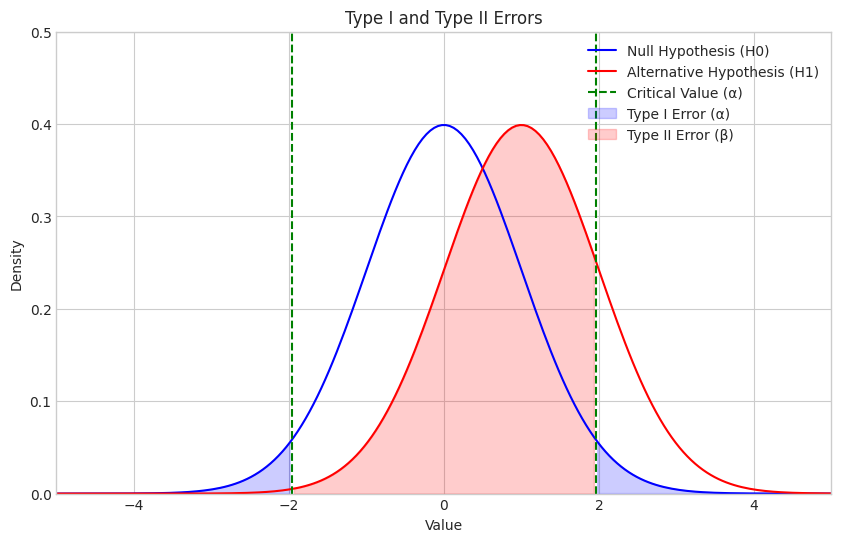

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

# パラメータ設定
mu_null = 0       # 帰無仮説の平均
std_null = 1      # 帰無仮説の標準偏差
mu_alt = 1        # 対立仮説の平均 (効果量)
std_alt = 1       # 対立仮説の標準偏差
alpha = 0.05      # 有意水準
sample_size = 100  # サンプルサイズ
n_frames = 100      # アニメーションフレーム数

# データ生成
x = np.linspace(-5, 5, 200)
null_distribution = norm(mu_null, std_null)
alt_distribution = norm(mu_alt, std_alt)

# クリティカル値の計算 (両側検定)
critical_value_left = null_distribution.ppf(alpha/2)
critical_value_right = null_distribution.ppf(1 - alpha/2)

# FigureとAxesの作成
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.5)
ax.set_xlabel("Value")
ax.set_ylabel("Density")
ax.set_title("Type I and Type II Errors")

# 描画要素の初期化
line_null, = ax.plot(x, null_distribution.pdf(x), label="Null Hypothesis (H0)", color="blue")
line_alt, = ax.plot(x, alt_distribution.pdf(x), label="Alternative Hypothesis (H1)", color="red")
line_critical_left = ax.axvline(critical_value_left, color="green", linestyle="--", label="Critical Value (α)")
line_critical_right = ax.axvline(critical_value_right, color="green", linestyle="--")
alpha_area = ax.fill_between(x, 0, null_distribution.pdf(x), where=(x < critical_value_left) | (x > critical_value_right), color='blue', alpha=0.2, label="Type I Error (α)")
beta_area = ax.fill_between(x, 0, alt_distribution.pdf(x), where=(x > critical_value_left) & (x < critical_value_right), color='red', alpha=0.2, label="Type II Error (β)")

# legend
ax.legend()

# アニメーション関数
def animate(i):
    # フレームごとにαを変化させる
    alpha_dynamic = 0.01 + (0.1 - 0.01) * (i / n_frames)  # αを0.01から0.1まで変化

    # 新しいクリティカル値を計算
    critical_value_left_dynamic = null_distribution.ppf(alpha_dynamic/2)
    critical_value_right_dynamic = null_distribution.ppf(1 - alpha_dynamic/2)

    # クリティカルラインの位置を更新
    line_critical_left.set_xdata([critical_value_left_dynamic, critical_value_left_dynamic])
    line_critical_right.set_xdata([critical_value_right_dynamic, critical_value_right_dynamic])

    # αエラーとβエラーの領域を更新
    alpha_area.remove()
    alpha_area = ax.fill_between(x, 0, null_distribution.pdf(x), where=(x < critical_value_left_dynamic) | (x > critical_value_right_dynamic), color='blue', alpha=0.2, label="Type I Error (α)")
    beta_area.remove()
    beta_area = ax.fill_between(x, 0, alt_distribution.pdf(x), where=(x > critical_value_left_dynamic) & (x < critical_value_right_dynamic), color='red', alpha=0.2, label="Type II Error (β)")

    # legendを更新 (labelは初期化時に設定したので不要)
    ax.legend()

    ax.set_title(f"Type I and Type II Errors (α = {alpha_dynamic:.2f})")
    return line_null, line_alt, line_critical_left, line_critical_right, alpha_area, beta_area

# アニメーションの作成
ani = animation.FuncAnimation(fig, animate, frames=n_frames, blit=False, repeat=True)

# アニメーションの保存 (必要であれば)
# ani.save("type1_type2_error.gif", writer="imagemagick", fps=10)  # imagemagick がインストールされている必要あり

plt.show()